In [74]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!
nobel = pd.read_csv("../00_datasets/nobel_prize_laureates.csv")
print(nobel.shape)
nobel.head()

(1000, 16)


,year,category,motivation,prizeShare,laureateID,fullName,gender,born,bornCountry,bornCity,died,diedCountry,diedCity,organizationName,organizationCountry,organizationCity
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,0000-00-00,NaN,NaN,Szeged University,Hungary,Szeged
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,USA,New York NY,0000-00-00,NaN,NaN,Harvard University,USA,Cambridge MA
2,2023,peace,for her fight against the oppression of women ...,1,1033,Narges Mohammadi,female,21-04-1972,Iran,Zanjan,0000-00-00,NaN,NaN,NaN,NaN,NaN
3,2023,literature,for his innovative plays and prose which give ...,1,1032,Jon Fosse,male,29-09-1959,Norway,Haugesund,0000-00-00,NaN,NaN,NaN,NaN,NaN
4,2023,chemistry,for the discovery and synthesis of quantum dots,3,1031,Alexei Ekimov,male,1945-00-00,Russia,NaN,0000-00-00,NaN,NaN,Nanocrystals Technology Inc.,USA,New York NY


In [75]:
print(nobel.columns)

Index(['year', 'category', 'motivation', 'prizeShare', 'laureateID',
       'fullName', 'gender', 'born', 'bornCountry', 'bornCity', 'died',
       'diedCountry', 'diedCity', 'organizationName', 'organizationCountry',
       'organizationCity'],
      dtype='object')


**What is the most commonly awarded gender and birth country?**
- Store your answers as string variables top_gender and top_country

In [76]:
nobel_prize_genders_count = nobel['gender'].value_counts().reset_index()
print(nobel_prize_genders_count)

nobel_prize_country_count = nobel['bornCountry'].value_counts().reset_index()
print(nobel_prize_country_count)

# top_gender=nobel_prize_genders_count['gender'][0] # "male"
# top_country=nobel_prize_country_count['bornCountry'][0] # "USA"
# print(top_gender, top_country)
top_gender="Male"
top_country="United States of America"

   gender  count
0    male    905
1  female     65
2     org     30
                bornCountry  count
0                       USA    292
1            United Kingdom     90
2                   Germany     84
3                    France     61
4                    Sweden     30
..                      ...    ...
83                Indonesia      1
84                 Slovenia      1
85                   Latvia      1
86                 Slovakia      1
87  Faroe Islands (Denmark)      1

[88 rows x 2 columns]


**Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?**

- Store this as an integer called max_decade_usa.

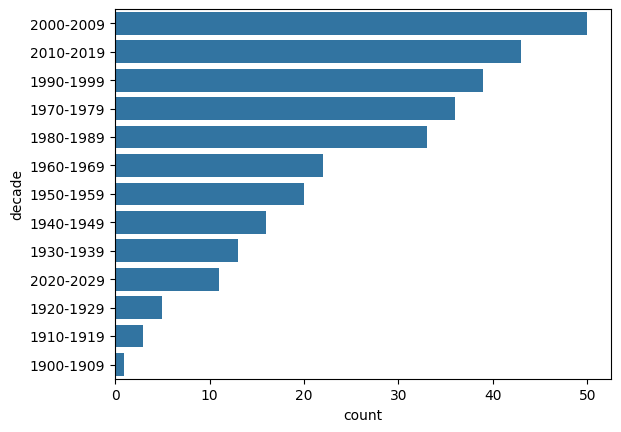

In [ ]:
# Define bins for decades
bins = list(range(1900, 2031, 10))  # 1900–2009, 2020–2029 ...
labels = [f"{b}-{b+9}" for b in bins[:-1]] # ['1900-1909', '1910-1919', ..., '2020-2029']
# print(bins)
# print(labels)

# Cut years into decades
nobel["decade"] = pd.cut(nobel["year"], bins=bins, labels=labels, right=True)
# print(nobel[['year', 'decade']])

# # Count values per decade
# decade_counts = nobel["decade"].value_counts().sort_index()

# Filter countries by top country i.e; USA
usa_nobel = nobel[nobel['bornCountry'] == 'USA']

# create bar plot of nobel prize winners by decade for only USA
sns.countplot(data=usa_nobel, y='decade', order=usa_nobel['decade'].value_counts().index)

# max_decade_usa= usa_nobel['decade'].value_counts().idxmax() # "2000-2009"
# print("The decade with the most Nobel Prize winners from the USA is:", max_decade_usa)
max_decade_usa= "2000-2009"


**Which decade and Nobel Prize category combination had the highest proportion of female laureates?**

- Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.

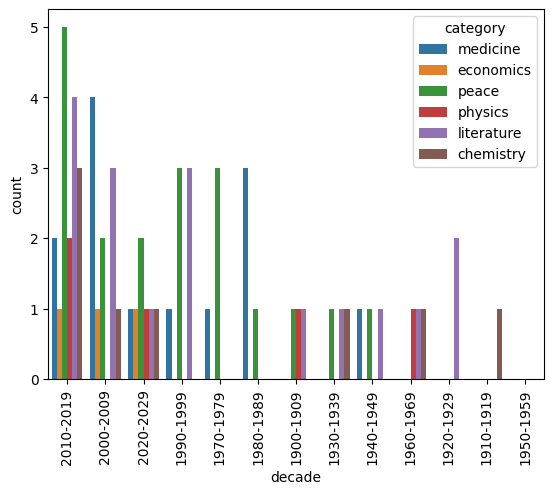

In [ ]:
# Filter gender by female
female_nobel = nobel[nobel['gender'] == 'female']

# create bar plot of nobel prize winners by decade for females only
sns.countplot(data=female_nobel, x='decade', order=female_nobel['decade'].value_counts().index, hue='category')
plt.xticks(rotation=90)

max_female_dict = { "2010-2019": "peace" } # results from plot

**Who was the first woman to receive a Nobel Prize, and in what category?**

- Save your string answers as first_woman_name and first_woman_category.

In [79]:
# sort female_nobel by year
female_nobel_sorted = female_nobel[['year', 'fullName', 'category']].sort_values(by='year', ascending=True)
print(female_nobel_sorted)

# results based on above values
first_woman_name="Marie Curie"
first_woman_category="physics"

     year            fullName    category
986  1903         Marie Curie     physics
970  1905  Bertha von Suttner       peace
943  1909      Selma Lagerlof  literature
937  1911         Marie Curie   chemistry
868  1926      Grazia Deledda  literature
..    ...                 ...         ...
19   2022        Annie Ernaux  literature
0    2023      Katalin Kariko    medicine
2    2023    Narges Mohammadi       peace
1    2023      Claudia Goldin   economics
7    2023     Anne L Huillier     physics

[65 rows x 3 columns]


**Which individuals or organizations have won more than one Nobel Prize throughout the years?**

- Store the full names in a list named repeat_list.

Most common full names of Nobel Prize winners
fullName
International Committee of the Red Cross                        3
Linus Pauling                                                   2
Office of the United Nations High Commissioner for Refugees     2
Barry Sharpless                                                 2
Frederick Sanger                                                2
Marie Curie                                                     2
John Bardeen                                                    2
Maria Goeppert Mayer                                            1
Eugene Wigner                                                   1
John Steinbeck                                                  1
Lev Landau                                                      1
Maurice Wilkins                                                 1
J. Hans D. Jensen                                               1
James Watson                                                    1
Francis Crick        

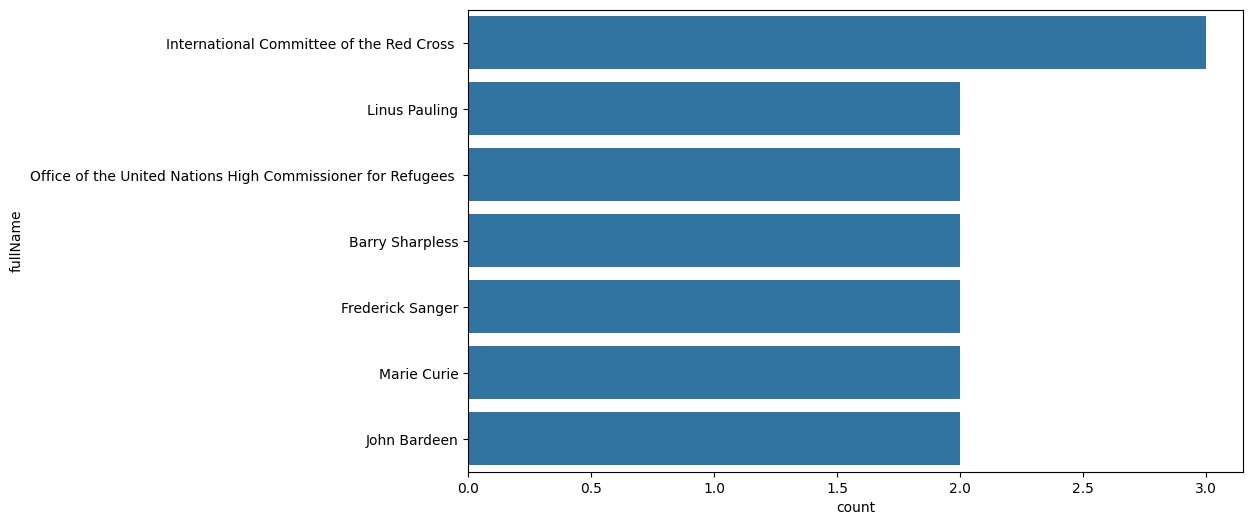

In [ ]:
# nobel['gender'].unique()

# Get most full names
most_full_names = nobel['fullName'].value_counts().head(15)
print("Most common full names of Nobel Prize winners")
print(most_full_names)

names_with_atleast_2_laureates = most_full_names[most_full_names >= 2]

# make a count plot of top 10 most common full names
plt.figure(figsize=(10, 6))
sns.countplot(data=nobel, y='fullName', order=names_with_atleast_2_laureates.index)

# names who won more than 2 nobel prizes
repeat_list = names_with_atleast_2_laureates.index.values.tolist()
print('-------------------------- recurrent names --------------------------')
print(repeat_list)